# Neighbourhoods in Mumbai

In [220]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

import matplotlib.pyplot as plt
import random # library for random number generation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [221]:
colors_old = { 'Western Suburbs':'red','Eastern Suburbs':'blue','Harbour Suburbs':'purple','South Mumbai':'green',}
df=pd.read_excel('Neighbourhoods_in_Mumbai.xlsx')
df.head()

,Neighborhood,Suburbs_Zone,Latitude,Longitude,Avarage House Price,grid
0,Andheri,Western Suburbs,19.119000,72.847000,18000,19
1,Marol,Western Suburbs,19.117300,72.884000,16000,19
2,Bhayandar,Western Suburbs,19.290000,72.850000,7500,ot
3,Bandra,Western Suburbs,19.054444,72.840556,32000,23
4,Borivali (West),Western Suburbs,19.238100,72.852300,16000,11


In [222]:
address = 'Mumbai Suburban'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

19.13095765 72.88593095460952


In [223]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, label, zone in zip(df.Latitude, df.Longitude, df.Neighborhood, df.Suburbs_Zone):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color=colors_old[zone],
        popup=label,
        fill = True,
        fill_color=colors_old[zone],
        fill_opacity=0.6
    ).add_to(venues_map)
    
venues_map

#### Define Foursquare Credentials and Version

In [224]:
CLIENT_ID = 'WZXGGFYR4BVJAFMNNNS2QBSQBPHNDRW2TWAVESILDLYCW552' # your Foursquare ID
CLIENT_SECRET = 'XGNR3QG4HZGSA5QBU0FCKFUJFD5DQXHPWROG14KOQSG1DKKH' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WZXGGFYR4BVJAFMNNNS2QBSQBPHNDRW2TWAVESILDLYCW552
CLIENT_SECRET:XGNR3QG4HZGSA5QBU0FCKFUJFD5DQXHPWROG14KOQSG1DKKH


# Explore Neighborhoods in Mumbai

#### Let's create a function to repeat the same process to all the neighborhoods.

In [225]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [226]:
mumbai_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Andheri
Marol
Bhayandar
Bandra
Borivali (West)
Borivali (East)
Dahisar
Goregaon
Jogeshwari
Juhu
Kandivali west
Kandivali east
Khar
Malad
Santacruz
Vasai
Naigaon
Nalasopara
Virar
Vile Parle
Bhandup
Ghatkopar
Kanjurmarg
Kurla
Mulund
Powai
Vidyavihar
Vikhroli
Chembur
Govandi
Mankhurd
Trombay
Agripada
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Dhobitalao
Dongri
Kala Ghoda
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Worli
Dharavi
Koliwada
Kumbarwara
Antop Hill
Byculla
Colaba
Dadar
Fort
Girgaon
Kalbadevi
Kamathipura
Parel
Tardeo


#### Let's check the size of the resulting dataframe

In [227]:
print(mumbai_venues.shape)
type(mumbai_venues)

(937, 7)


pandas.core.frame.DataFrame

In [228]:
mumbai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Andheri,19.119,72.847,Merwans Cake shop,19.119300,72.845418,Bakery
1,Andheri,19.119,72.847,Narayan Sandwich,19.121398,72.850270,Sandwich Place
2,Andheri,19.119,72.847,McDonald's,19.119691,72.846102,Fast Food Restaurant
3,Andheri,19.119,72.847,Cafe Alfa,19.119667,72.843560,Indian Restaurant
4,Andheri,19.119,72.847,Vaibhav Restaurant,19.118235,72.847991,Indian Restaurant


In [229]:
d1=mumbai_venues.groupby('Venue Category').count()
d1.size

1002

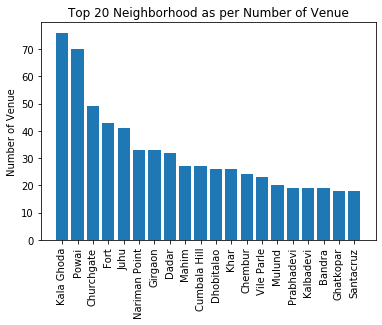

In [230]:
df_venue = mumbai_venues[['Neighborhood','Venue']].groupby(['Neighborhood']).count().sort_values(by=['Venue'],ascending=False).head(20)
df_venue
plt.bar(df_venue.index,df_venue['Venue'])
plt.xticks(rotation=90)
plt.ylabel('Number of Venue')
plt.title('Top 20 Neighborhood as per Number of Venue')
plt.show()

Let's check how many venues were returned for each neighborhood

In [231]:
mumbai_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agripada,5,5,5,5,5,5
Andheri,11,11,11,11,11,11
Antop Hill,4,4,4,4,4,4
Bandra,19,19,19,19,19,19
Bhandup,5,5,5,5,5,5
Bhayandar,1,1,1,1,1,1
Borivali (East),9,9,9,9,9,9
Borivali (West),10,10,10,10,10,10
Byculla,10,10,10,10,10,10


#### Let's find out how many unique categories can be curated from all the returned venues

In [232]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 167 uniques categories.


# Analyze Each Neighborhood

In [233]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighborhood'] = mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Neighborhood,ATM,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Bus Line,Business Service,Cafeteria,Café,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Insurance Office,Intersection,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Lighthouse,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Mountain,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Restaurant,Roof Deck,Sake Bar,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Theater,Theme Park,Tourist Information Center,Train,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Andheri,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [234]:
mumbai_onehot.shape

(937, 168)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [235]:
mumbai_grouped = mumbai_onehot.groupby('Neighborhood').mean().reset_index()
mumbai_grouped

,Neighborhood,ATM,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Bus Line,Business Service,Cafeteria,Café,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Insurance Office,Intersection,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Lighthouse,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Mountain,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Restaurant,Roof Deck,Sake Bar,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Theater,Theme Park,Tourist Information Center,Train,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Agripada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,Andheri,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.

#### Let's confirm the new size

In [236]:
mumbai_grouped.shape

(62, 168)

#### Let's print each neighborhood along with the top 5 most common venues

In [237]:
num_top_venues = 5

for hood in mumbai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mumbai_grouped[mumbai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agripada----
               venue  freq
0             Bakery   0.4
1  Indian Restaurant   0.2
2        Coffee Shop   0.2
3                Gym   0.2
4                ATM   0.0


----Andheri----
                  venue  freq
0     Indian Restaurant  0.18
1  Fast Food Restaurant  0.18
2        Sandwich Place  0.09
3            Food Truck  0.09
4              Platform  0.09


----Antop Hill----
               venue  freq
0  Indian Restaurant  0.25
1      Train Station  0.25
2              Diner  0.25
3      Grocery Store  0.25
4                ATM  0.00


----Bandra----
                venue  freq
0   Indian Restaurant  0.26
1                Café  0.11
2  Italian Restaurant  0.05
3      Breakfast Spot  0.05
4            Platform  0.05


----Bhandup----
                venue  freq
0   Indian Restaurant   0.6
1                 Bar   0.4
2                 ATM   0.0
3       Moving Target   0.0
4  Mughlai Restaurant   0.0


----Bhayandar----
                     venue  freq
0           Ship

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [238]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [239]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agripada,Bakery,Indian Restaurant,Coffee Shop,Gym,Diner,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store
1,Andheri,Indian Restaurant,Fast Food Restaurant,Bakery,Platform,Restaurant,Sandwich Place,Burger Joint,Food Truck,Food Court,Gym
2,Antop Hill,Indian Restaurant,Grocery Store,Train Station,Diner,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store,Dumpling Restaurant
3,Bandra,Indian Restaurant,Café,Paper / Office Supplies Store,Italian Restaurant,Brewery,Breakfast Spot,Restaurant,Furniture / Home Store,Lake,Platform
4,Bhandup,Indian Restaurant,Bar,Donut Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store,Dumpling Restaurant


# Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [240]:
# set number of clusters
kclusters = 5

mumbai_grouped_clustering = mumbai_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 2, 2, 3, 0, 0, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [241]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mumbai_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



# check the last columns!
mumbai_merged#.head()

,Neighborhood,Suburbs_Zone,Latitude,Longitude,Avarage House Price,grid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andheri,Western Suburbs,19.119000,72.847000,18000,19,0.0,Indian Restaurant,Fast Food Restaurant,Bakery,Platform,Restaurant,Sandwich Place,Burger Joint,Food Truck,Food Court,Gym
1,Marol,Western Suburbs,19.117300,72.884000,16000,19,2.0,Snack Place,Indian Restaurant,Hotel,Gym,Diner,Hotel Pool,Dhaba,Flea Market,Field,Fast Food Restaurant
2,Bhayandar,Western Suburbs,19.290000,72.850000,7500,ot,3.0,Shipping Store,Zoo,Donut Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store,Dumpling Restaurant
3,Bandra,Western Suburbs,19.054444,72.840556,32000,23,2.0,Indian Restaurant,Café,Paper / Office Supplies Store,Italian Restaurant,Brewery,Breakfast Spot,Restaurant,Furniture / Home Store,Lake,Platform
4,Borivali (West),Western Suburbs,19.238100,72.852300,16000,11,0.0,Park,Intersection,Pizza Place,Shop & Service,Soccer Field,Italian Restaurant,Gym,Pharmacy,Ice Cream Shop,Gym / Fitness Center
5,Borivali (East),Western Suburbs,19.229800,72.860900,16500,11,0.0,Clothing Store,Chinese Restaurant,Platform,Burger Joint,Snack Place,Scenic Lookout,Park,Indian Restaurant,Department Store,Dumpling Restaurant
6,Dahisar,Western Suburbs,19.250069,72.859347,11500,15,0.0,Indian Restaurant,Pizza Place,Train Station,Café,Restaurant,Bar,Donut Shop,Flea Market,Field,Fast Food Restaurant
7,Goregaon,Western Suburbs,19.155000,72.850000,16000,20,0.0,Sandwich Place,Bank,Ice Cream Shop,Train Station,Zoo,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store
8,Jogeshwari,Western Suburbs,19.143900,72.842800,20000,14,0.0,Ice Cream Shop,Café,Men's Store,Bakery,Deli / Bodega,Department Store,Food,Flower Shop,Cupcake Shop,Flea Market
9,Juhu,Western Suburbs,19.100000,72.830000,37000,14,0.0,Indian Restaurant,Hotel,Bar,Café,Dessert Shop,Fast Food Restaurant,Spa,Furniture / Home Store,Boutique,Lounge


Finally, let's visualize the resulting clusters

In [242]:
mumbai_merged=mumbai_merged.dropna()
#int(mumbai_merged['Cluster Labels'][0])

In [243]:
mumbai_merged.head()

,Neighborhood,Suburbs_Zone,Latitude,Longitude,Avarage House Price,grid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andheri,Western Suburbs,19.119000,72.847000,18000,19,0.0,Indian Restaurant,Fast Food Restaurant,Bakery,Platform,Restaurant,Sandwich Place,Burger Joint,Food Truck,Food Court,Gym
1,Marol,Western Suburbs,19.117300,72.884000,16000,19,2.0,Snack Place,Indian Restaurant,Hotel,Gym,Diner,Hotel Pool,Dhaba,Flea Market,Field,Fast Food Restaurant
2,Bhayandar,Western Suburbs,19.290000,72.850000,7500,ot,3.0,Shipping Store,Zoo,Donut Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store,Dumpling Restaurant
3,Bandra,Western Suburbs,19.054444,72.840556,32000,23,2.0,Indian Restaurant,Café,Paper / Office Supplies Store,Italian Restaurant,Brewery,Breakfast Spot,Restaurant,Furniture / Home Store,Lake,Platform
4,Borivali (West),Western Suburbs,19.238100,72.852300,16000,11,0.0,Park,Intersection,Pizza Place,Shop & Service,Soccer Field,Italian Restaurant,Gym,Pharmacy,Ice Cream Shop,Gym / Fitness Center


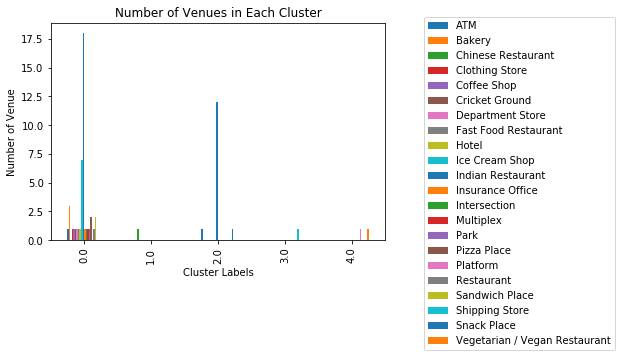

In [244]:
df_venue_cluster = mumbai_merged[['Cluster Labels','1st Most Common Venue','Neighborhood']].groupby(['Cluster Labels','1st Most Common Venue']).count()
df_venue_cluster.columns = ['Count']
mumbai_merged_pivot=pd.pivot_table(mumbai_merged, values = 'Suburbs_Zone', index = 'Cluster Labels',
               columns = '1st Most Common Venue',aggfunc ='count')
mumbai_merged_pivot
ax=mumbai_merged_pivot.plot.bar(title='Number of Venues in Each Cluster')
ax.set_ylabel("Number of Venue")
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [245]:
df_venue_cluster

Count
Cluster Labels 1st Most Common Venue               
0.0            ATM                                1
               Bakery                             3
               Clothing Store                     1
               Coffee Shop                        1
               Cricket Ground                     1
               Department Store                   1
               Fast Food Restaurant               1
               Hotel                              1
               Ice Cream Shop                     7
               Indian Restaurant                 18
               Insurance Office                   1
               Intersection                       1
               Multiplex                          1
               Park                               1
               Pizza Place                        2
               Restaurant                         1
               Sandwich Place                     2
1.0            Chinese Restaurant                 1
2.0            ATM                                1
               Indian Restaurant                 12
               Snack Place                        1
3.0            Shipping Store                     1
4.0            Platform                           1
               Vegetarian / Vegan Restaurant      1

Text(0.5, 1.0, 'Avarge Sale Price')

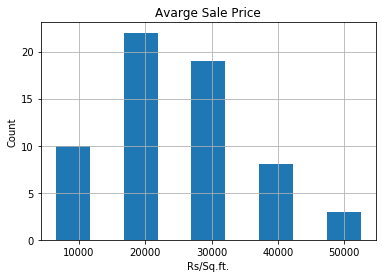

In [246]:
df_AHP = mumbai_merged['Avarage House Price']
hist = df_AHP.hist(bins=5,rwidth=0.5)
hist.set_ylabel("Count")
hist.set_xlabel("Rs/Sq.ft.")
hist.set_title('Avarge Sale Price')


In [247]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Neighborhood'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    colorid=int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[colorid],
        fill=True,
        fill_color=rainbow[colorid],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

### Cluster 1

In [248]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

,Suburbs_Zone,grid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Western Suburbs,19,0.0,Indian Restaurant,Fast Food Restaurant,Bakery,Platform,Restaurant,Sandwich Place,Burger Joint,Food Truck,Food Court,Gym
4,Western Suburbs,11,0.0,Park,Intersection,Pizza Place,Shop & Service,Soccer Field,Italian Restaurant,Gym,Pharmacy,Ice Cream Shop,Gym / Fitness Center
5,Western Suburbs,11,0.0,Clothing Store,Chinese Restaurant,Platform,Burger Joint,Snack Place,Scenic Lookout,Park,Indian Restaurant,Department Store,Dumpling Restaurant
6,Western Suburbs,15,0.0,Indian Restaurant,Pizza Place,Train Station,Café,Restaurant,Bar,Donut Shop,Flea Market,Field,Fast Food Restaurant
7,Western Suburbs,20,0.0,Sandwich Place,Bank,Ice Cream Shop,Train Station,Zoo,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store
8,Western Suburbs,14,0.0,Ice Cream Shop,Café,Men's Store,Bakery,Deli / Bodega,Department Store,Food,Flower Shop,Cupcake Shop,Flea Market
9,Western Suburbs,14,0.0,Indian Restaurant,Hotel,Bar,Café,Dessert Shop,Fast Food Restaurant,Spa,Furniture / Home Store,Boutique,Lounge
10,Western Suburbs,22,0.0,Restaurant,Park,Wine Shop,Food Truck,Fast Food Restaurant,Bar,Zoo,Flea Market,Field,Electronics Store
11,Western Suburbs,22,0.0,Ice Cream Shop,Coffee Shop,Shopping Mall,Gym / Fitness Center,Sandwich Place,Food Truck,Soccer Field,Plaza,Bakery,Dessert Shop
14,Western Suburbs,18,0.0,Indian Restaurant,Women's Store,Market,Bakery,Sandwich Place,Fast Food Restaurant,Moving Target,Chinese Restaurant,Jewelry Store,Steakhouse


### Cluster 2

In [249]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

,Suburbs_Zone,grid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Western Suburbs,ot,1.0,Chinese Restaurant,Zoo,Diner,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store,Dumpling Restaurant


### Cluster 3

In [250]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

,Suburbs_Zone,grid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Western Suburbs,19,2.0,Snack Place,Indian Restaurant,Hotel,Gym,Diner,Hotel Pool,Dhaba,Flea Market,Field,Fast Food Restaurant
3,Western Suburbs,23,2.0,Indian Restaurant,Café,Paper / Office Supplies Store,Italian Restaurant,Brewery,Breakfast Spot,Restaurant,Furniture / Home Store,Lake,Platform
12,Western Suburbs,23,2.0,Indian Restaurant,Bar,Pub,Lounge,Gym,Fast Food Restaurant,Bengali Restaurant,Beer Garden,Beer Bar,Bed & Breakfast
13,Western Suburbs,21,2.0,Indian Restaurant,Gift Shop,Cosmetics Shop,Snack Place,Market,Train,Tourist Information Center,Fast Food Restaurant,Dessert Shop,Zoo
20,Eastern Suburbs,12,2.0,Indian Restaurant,Bar,Donut Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store,Dumpling Restaurant
21,Eastern Suburbs,10,2.0,Indian Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop,Restaurant,Gift Shop,Snack Place,Food Truck,Bakery,Department Store
29,Harbour Suburbs,16,2.0,ATM,Gym,Concert Hall,Indian Restaurant,Hotel,Dhaba,Flea Market,Field,Fast Food Restaurant,Electronics Store
35,South Mumbai,1,2.0,Indian Restaurant,Garden,Diner,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop
48,South Mumbai,8,2.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Sandwich Place,Snack Place,Grocery Store,Gym / Fitness Center,Cosmetics Shop,History Museum,Flea Market,Fast Food Restaurant
52,South Mumbai,3,2.0,Indian Restaurant,Dessert Shop,Ice Cream Shop,Antique Shop,Arcade,Market,BBQ Joint,Restaurant,Electronics Store,Food


### Cluster 4

In [251]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

,Suburbs_Zone,grid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Western Suburbs,ot,3.0,Shipping Store,Zoo,Donut Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store,Dumpling Restaurant


### Cluster 5

In [252]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

,Suburbs_Zone,grid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Western Suburbs,ot,4.0,Platform,Train Station,Zoo,Dhaba,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store,Dumpling Restaurant
51,South Mumbai,8,4.0,Vegetarian / Vegan Restaurant,Train Station,Zoo,Dhaba,Flower Shop,Flea Market,Field,Fast Food Restaurant,Electronics Store,Dumpling Restaurant


In [253]:
world_geo = r'BMC_Wards.geojson' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

In [254]:
address = 'Mumbai Suburban'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

19.13095765 72.88593095460952


In [255]:
world_geo = r'BMC_Wards.geojson' # geojson file

# create a plain world map
world_map = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Mapbox Bright')

df1=pd.read_excel('Neighbourhoods_in_Mumbai_Sales_Rate.xlsx')
df1.head()
world_map.choropleth(
    geo_data=world_geo,
    data=df1,
    columns=['name', 'Avarage House Price'], #'Avarage House Price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Avarage House Price (Rs per sq. ft.)'
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, Vanue, AHP in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Neighborhood'], mumbai_merged['Cluster Labels'],mumbai_merged['1st Most Common Venue'],mumbai_merged['Avarage House Price']):
    label = folium.Popup(str(poi) + ', Cluster=' + str(cluster)+',\n 1st Most Common Venue='+str(Vanue)+',\n Avarage House Price='+str(AHP), parse_html=True)
    colorid=int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[colorid],
        fill=True,
        fill_color=rainbow[colorid],
        fill_opacity=0.7).add_to(world_map)
       
world_map